# Study of deforestation with satellite data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

## 2. First Approach

#### 2.1 Definition of the Forest Rate

###### Reading image of the deforestation area for the year 2019

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2126091297.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_zone = imageio.imread(filename1)
C:\Users\pik58\anaconda3\lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


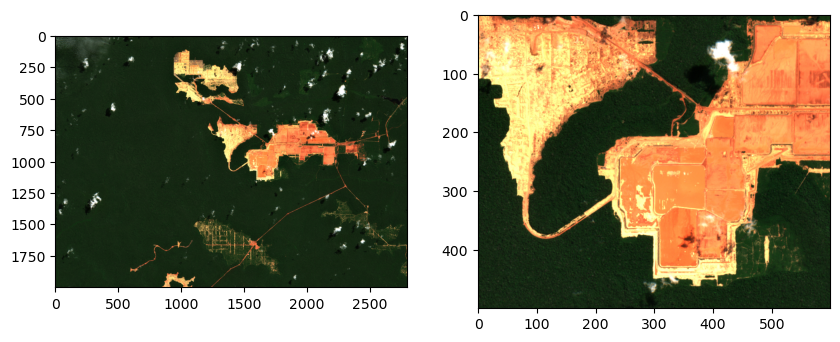

In [3]:
filename1 = "../data/Zone 1/Image 2019/T21MWU_20190729T141051_TCI_10m.jp2"
imag_zone = imageio.imread(filename1)

#Intro pictures
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(imag_zone[7700:9700,4200:7000])
ax[1].imshow(imag_zone[8400:8900,5500:6100])
plt.show()

###### Application of a vegetation index and a thresholding

Explication mask

In [3]:
zoom_zone=imag_zone[8400:8900,5500:6100]

r_zone = zoom_zone[:, :, 0]
g_zone = zoom_zone[:, :, 1]
b_zone = zoom_zone[:, :, 2]

#Vegetation index NDVI
ndvi_green_zone = (g_zone - r_zone) / (g_zone + r_zone)

#Application of a thresholding
thresholded_zone = ndvi_green_zone < 0.5

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_zone)
ax[1].imshow(thresholded_zone, cmap='gray')
ax[0].set_title('Original Image')
ax[1].set_title('Thresholded Image')
plt.show()

C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\504886672.py:8: RuntimeWarning: divide by zero encountered in true_divide
  ndvi_green_zone = (g_zone - r_zone) / (g_zone + r_zone)


###### Deforestation rate

We count the white pixels of the thresholded image

In [5]:
#Definition of the forest rate
def forest_rate(img):   
    s = 0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] == True:
                s+=1
    s = 100* s/(len(img) * len(img[0]))
    return s

In [5]:
#Previous image forest rate
print(forest_rate(thresholded_zone))

54.169


Application to another aera : we use the NDVI in blue for better results

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\628493122.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_champs = imageio.imread(filename2)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\628493122.py:11: RuntimeWarning: divide by zero encountered in divide
  ndvi_blue_champs = (b_champs - r_champs) / (b_champs + r_champs)


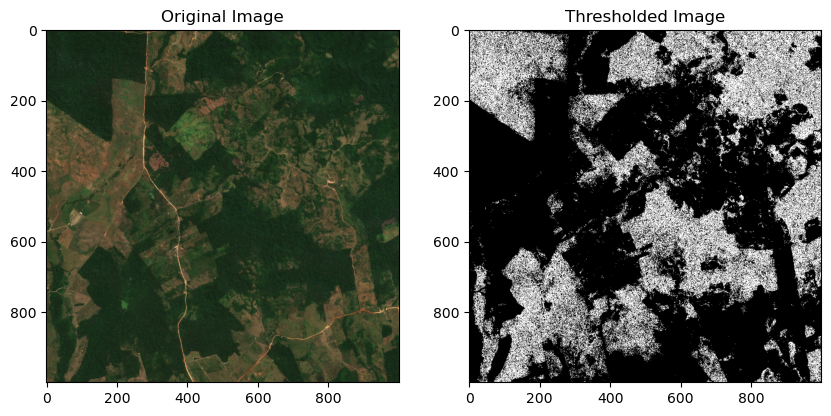

27.5466


In [6]:
filename2 = "../data/Zone 3/T21MXR_20200802T141051_TCI_10m.jp2"
imag_champs = imageio.imread(filename2)

zoom_champs = imag_champs[4000:5000,2000:3000]

r_champs = zoom_champs[:, :, 0]
g_champs = zoom_champs[:, :, 1]
b_champs = zoom_champs[:, :, 2]

#NDVI but in blue (for better results)
ndvi_blue_champs = (b_champs - r_champs) / (b_champs + r_champs)

#Application of a Thresholding
thresholded_champs = ndvi_blue_champs < 0.1

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_champs)
ax[0].set_title('Original Image')
ax[1].imshow(thresholded_champs, cmap='gray')
ax[1].set_title('Thresholded Image')
plt.show()

print(forest_rate(thresholded_champs))

Application of another vegetation index : NDVI green&blue

With this NDVI, we have to define the forest rate inverse because the resulting image will have the forest in black and the deforested zone in white

In [7]:
#Definition of the forest rate inverse
def forest_rate_inverse(img):
    s = 0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] == False:
                s+=1
    s = 100* s/(len(img) * len(img[0]))
    return s

In [7]:
#Application for the first image

imag_zone_2 = imageio.imread(filename1)
zoom_zone_2=imag_zone_2[8400:8900,5500:6100]

r_zone_2 = zoom_zone_2[:, :, 0]
g_zone_2 = zoom_zone_2[:, :, 1]
b_zone_2 = zoom_zone_2[:, :, 2]

#Vegetation index NDVI
ndvi_green_blue_zone = (b_zone_2 - g_zone_2) / (b_zone_2 + g_zone_2)

#Application of a Thresholding
thresholded_zone_2 = ndvi_green_blue_zone <3

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_zone_2)
ax[1].imshow(thresholded_zone_2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].set_title('Thresholded Image')
plt.show()

print(forest_rate_inverse(thresholded_zone_2))

C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\1919431254.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_zone_2 = imageio.imread(filename1)
C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\1919431254.py:11: RuntimeWarning: divide by zero encountered in true_divide
  ndvi_green_blue_zone = (b_zone_2 - g_zone_2) / (b_zone_2 + g_zone_2)
C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\1919431254.py:11: RuntimeWarning: invalid value encountered in true_divide
  ndvi_green_blue_zone = (b_zone_2 - g_zone_2) / (b_zone_2 + g_zone_2)


54.806666666666665


we obtain 54.8 with the NDVI green&blue instead of 54.2 (with the NDVI green)

In [9]:
#Application for the second image

imag_champs_2 = imageio.imread(filename2)
zoom_champs_2 = imag_champs_2[4000:5000,2000:3000]

r_champs_2 = zoom_champs_2[:, :, 0]
g_champs_2 = zoom_champs_2[:, :, 1]
b_champs_2 = zoom_champs_2[:, :, 2]

#NDVI but in blue (for better results)
ndvi_green_blue_champs = (b_champs_2 - g_champs_2) / (b_champs_2 + g_champs_2)

#Application of a Thresholding
thresholded_champs_2 = ndvi_green_blue_champs < 2.5

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_champs_2)
ax[0].set_title('Original Image')
ax[1].imshow(thresholded_champs_2, cmap='gray')
ax[1].set_title('Thresholded Image')
plt.show()

print(forest_rate_inverse(thresholded_champs_2))

C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\1069798653.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_champs_2 = imageio.imread(filename2)
C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\1069798653.py:11: RuntimeWarning: divide by zero encountered in true_divide
  ndvi_green_blue_champs = (b_champs_2 - g_champs_2) / (b_champs_2 + g_champs_2)


55.4094


we obtain 55.4 with the NDVI green&blue instead of 27.5 (with the NDVI green)

#### 2.2 Application

In [8]:
import cv2

###### Distribution histogram of 2019

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1367455633.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img19 = imageio.imread(filename_2019)


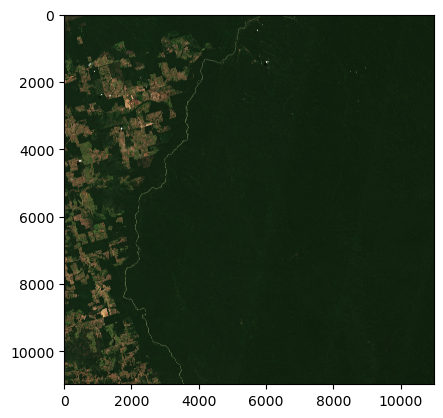

In [9]:
# Reading image for the year 2019

filename_2019 = "../data/Zone 2 - Fields/image juillet 2019/T21MYN_20190716T140101_TCI_10m.jp2"
img19 = imageio.imread(filename_2019)

plt.imshow(img19)
plt.show()

r19 = img19[:,:,0]
g19 = img19[:,:,1]
b19 = img19[:,:,2]

hist_b19 = cv2.calcHist([b19],[0],None,[256],[0,256])
hist_g19 = cv2.calcHist([g19],[0],None,[256],[0,256])
hist_r19 = cv2.calcHist([r19],[0],None,[256],[0,256])
plt.plot(hist_r19, color='r', label="r")
plt.plot(hist_g19, color='g', label="g")
plt.plot(hist_b19, color='b', label="b")
plt.legend()
plt.show() 

###### Evolution of a forest in 4 years

Reading images for the years 2019 to 2022

In [10]:
# 2019
img_2019 = imageio.imread(filename_2019)

# 2020
filename_2020 = "../data/Zone 2 - Fields/image août 2020/T21MYN_20200814T140059_TCI_10m.jp2"
img_2020 = imageio.imread(filename_2020)

#2022
filename_2022 = "../data/Zone 2 - Fields/image juillet 2022/T21MYN_20220720T135721_TCI_10m.jp2"
img_2022 = imageio.imread(filename_2022)

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2029374776.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_2019 = imageio.imread(filename_2019)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2029374776.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_2020 = imageio.imread(filename_2020)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2029374776.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or 

Application of the NDVI green&blue and the thresholding for the images of the years 2019 to 2022

C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2616898568.py:10: RuntimeWarning: divide by zero encountered in true_divide
  ndvi_green_blue_2019 = (b_2019 - g_2019) / (b_2019 + g_2019)
C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2616898568.py:10: RuntimeWarning: invalid value encountered in true_divide
  ndvi_green_blue_2019 = (b_2019 - g_2019) / (b_2019 + g_2019)


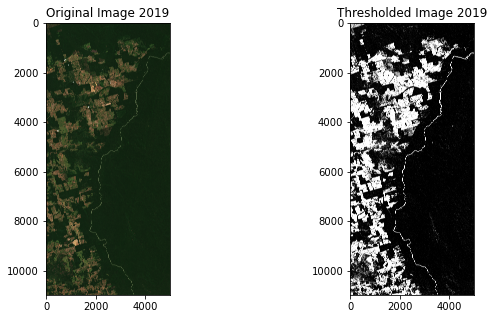

C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2616898568.py:33: RuntimeWarning: divide by zero encountered in true_divide
  ndvi_green_blue_2020 = (b_2020 - g_2020) / (b_2020 + g_2020)
C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2616898568.py:33: RuntimeWarning: invalid value encountered in true_divide
  ndvi_green_blue_2020 = (b_2020 - g_2020) / (b_2020 + g_2020)


C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2616898568.py:55: RuntimeWarning: divide by zero encountered in true_divide
  ndvi_green_blue_2022 = (b_2022 - g_2022) / (b_2022 + g_2022)
C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2616898568.py:55: RuntimeWarning: invalid value encountered in true_divide
  ndvi_green_blue_2022 = (b_2022 - g_2022) / (b_2022 + g_2022)


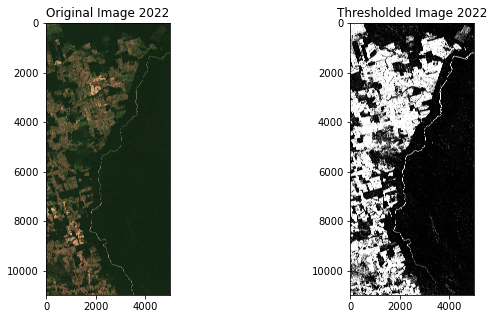

In [12]:
#2019

zoom_2019 = img_2019[:,0:5000,:]

r_2019 = zoom_2019[:,:, 0]
g_2019 = zoom_2019[:,:, 1]
b_2019 = zoom_2019[:,:, 2]

#Vegetation index NDVI green&blue
ndvi_green_blue_2019 = (b_2019 - g_2019) / (b_2019 + g_2019)

#Application of a Thresholding
thresholded_2019 = ndvi_green_blue_2019 < 3

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2019)
ax[0].set_title('Original Image 2019')
ax[1].imshow(thresholded_2019, cmap='gray')
ax[1].set_title('Thresholded Image 2019')
plt.show()


#2020

zoom_2020 = img_2020[:, 0:5000, :]

r_2020 = zoom_2020[:,:, 0]
g_2020 = zoom_2020[:,:, 1]
b_2020 = zoom_2020[:,:, 2]

#Vegetation index NDVI green&blue
ndvi_green_blue_2020 = (b_2020 - g_2020) / (b_2020 + g_2020)

#Application of a Thresholding
thresholded_2020 = ndvi_green_blue_2020 < 2

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2020)
ax[0].set_title('Original Image 2020')
ax[1].imshow(thresholded_2020, cmap='gray')
ax[1].set_title('Thresholded Image 2020')
plt.show()

#2022

zoom_2022 = img_2022[:,0 :5000, :]

r_2022 = zoom_2022[:,:, 0]
g_2022 = zoom_2022[:,:, 1]
b_2022 = zoom_2022[:,:, 2]

#Vegetation index NDVI green&blue
ndvi_green_blue_2022 = (b_2022 - g_2022) / (b_2022 + g_2022)

#Application of a Thresholding
thresholded_2022 = ndvi_green_blue_2022 < 3

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2022)
ax[0].set_title('Original Image 2022')
ax[1].imshow(thresholded_2022, cmap='gray')
ax[1].set_title('Thresholded Image 2022')
plt.show()

###### Evolution of the forest rate

Determination of forest rates for the years 2019 to 2022

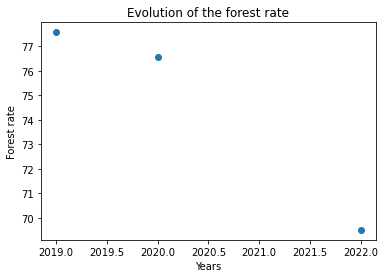

In [13]:
temps = [2019,2020,2022]
rate = [forest_rate_inverse(thresholded_2019),forest_rate_inverse(thresholded_2020),forest_rate_inverse(thresholded_2022)]
plt.scatter(temps, rate)
plt.xlabel('Years')
plt.ylabel('Forest rate')
plt.title('Evolution of the forest rate')
plt.show()

###### Evolution of another forest in 8 years

Reading images for years 2014 to 2018

In [12]:
# 2014
filename_2014 = "../data/Zone 1/Image 2014/LC08_L1TP_229061_20140910_20200910_02_T1.jpg"
img_2014 = imageio.imread(filename_2014)

# 2016
filename_2016 = "../data/Zone 1/Image 2016/LC08_L1TP_229061_20161017_20200905_02_T1.jpg"
img_2016 = imageio.imread(filename_2016)

# 2017
filename_2017 = "../data/Zone 1/Image 2017/LC08_L1TP_229061_20171105_20200902_02_T1.jpg"
img_2017 = imageio.imread(filename_2017)

# 2018
filename_2018 = "../data/Zone 1/Image 2018/LC08_L1TP_229061_20181023_20200830_02_T1.jpg"
img_2018 = imageio.imread(filename_2018)

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\4198134899.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_2014 = imageio.imread(filename_2014)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\4198134899.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_2016 = imageio.imread(filename_2016)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\4198134899.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or 

Application of the NDVI green&blue and the thresholding for the images of the years 2014 to 2018

In [13]:
#2014

zoom_2014 = img_2014[4450:5100,5900:6700]

r_2014 = zoom_2014[:,:, 0]
g_2014 = zoom_2014[:,:, 1]
b_2014 = zoom_2014[:,:, 2]

#Vegetation index NDVI blue
ndvi_blue_2014 = (b_2014 - r_2014) / (b_2014 + r_2014)

#Application of a Thresholding
thresholded_2014 = ndvi_blue_2014 < 1.3

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2014)
ax[0].set_title('Original Image 2014')
ax[1].imshow(thresholded_2014, cmap='gray')
ax[1].set_title('Thresholded Image 2014')
plt.show()


#2016

zoom_2016 = img_2016[4450:5100,5900:6700]

r_2016 = zoom_2016[:,:, 0]
g_2016 = zoom_2016[:,:, 1]
b_2016 = zoom_2016[:,:, 2]

#Vegetation index NDVI blue
ndvi_blue_2016 = (b_2016 - r_2016) / (b_2016 + r_2016)

#Application of a Thresholding
thresholded_2016 = ndvi_blue_2016 < 1.3 

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2016)
ax[0].set_title('Original Image 2016')
ax[1].imshow(thresholded_2016, cmap='gray')
ax[1].set_title('Thresholded Image 2016')
plt.show()


#2017

zoom_2017 = img_2017[4450:5100,5900:6700]

r_2017 = zoom_2017[:,:, 0]
g_2017 = zoom_2017[:,:, 1]
b_2017 = zoom_2017[:,:, 2]

#Vegetation index NDVI blue
ndvi_blue_2017 = (b_2017 - r_2017) / (b_2017 + r_2017)

#Application of a Thresholding
thresholded_2017 = ndvi_blue_2017 < 1.3 

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2017)
ax[0].set_title('Original Image 2017')
ax[1].imshow(thresholded_2017, cmap='gray')
ax[1].set_title('Thresholded Image 2017')
plt.show()


#2018

zoom_2018 = img_2018[4450:5100,5900:6700]

r_2018 = zoom_2018[:,:, 0]
g_2018 = zoom_2018[:,:, 1]
b_2018 = zoom_2018[:,:, 2]

#Vegetation index NDVI blue
ndvi_blue_2018 = (b_2018 - r_2018) / (b_2018 + r_2018)

#Application of a Thresholding
thresholded_2018 = ndvi_blue_2018 < 1.3

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2018)
ax[0].set_title('Original Image 2018')
ax[1].imshow(thresholded_2018, cmap='gray')
ax[1].set_title('Thresholded Image 2018')
plt.show()

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:10: RuntimeWarning: divide by zero encountered in divide
  ndvi_blue_2014 = (b_2014 - r_2014) / (b_2014 + r_2014)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:10: RuntimeWarning: invalid value encountered in divide
  ndvi_blue_2014 = (b_2014 - r_2014) / (b_2014 + r_2014)


C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:33: RuntimeWarning: divide by zero encountered in divide
  ndvi_blue_2016 = (b_2016 - r_2016) / (b_2016 + r_2016)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:33: RuntimeWarning: invalid value encountered in divide
  ndvi_blue_2016 = (b_2016 - r_2016) / (b_2016 + r_2016)


C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:56: RuntimeWarning: divide by zero encountered in divide
  ndvi_blue_2017 = (b_2017 - r_2017) / (b_2017 + r_2017)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:56: RuntimeWarning: invalid value encountered in divide
  ndvi_blue_2017 = (b_2017 - r_2017) / (b_2017 + r_2017)


C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:79: RuntimeWarning: divide by zero encountered in divide
  ndvi_blue_2018 = (b_2018 - r_2018) / (b_2018 + r_2018)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2912921897.py:79: RuntimeWarning: invalid value encountered in divide
  ndvi_blue_2018 = (b_2018 - r_2018) / (b_2018 + r_2018)


Application of the NDVI green&blue and the thresholding for the images of the years 2019 to 2022

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1104152143.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2019 = imageio.imread(filename1)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1104152143.py:17: RuntimeWarning: divide by zero encountered in divide
  ndvi_green_blue_2019 = (b_2019 - g_2019) / (b_2019 + g_2019)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1104152143.py:17: RuntimeWarning: invalid value encountered in divide
  ndvi_green_blue_2019 = (b_2019 - g_2019) / (b_2019 + g_2019)


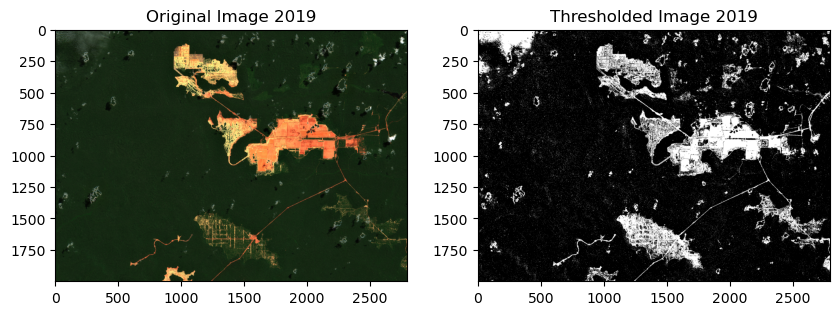

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1104152143.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2020 = imageio.imread(filename3)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1104152143.py:42: RuntimeWarning: divide by zero encountered in divide
  ndvi_green_blue_2020 = (b_2020 - g_2020) / (b_2020 + g_2020)


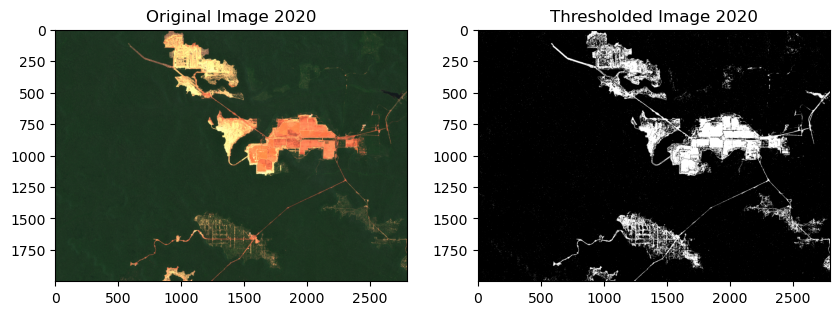

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1104152143.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2022 = imageio.imread(filename4)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\1104152143.py:67: RuntimeWarning: divide by zero encountered in divide
  ndvi_green_blue_2022 = (b_2022 - g_2022) / (b_2022 + g_2022)


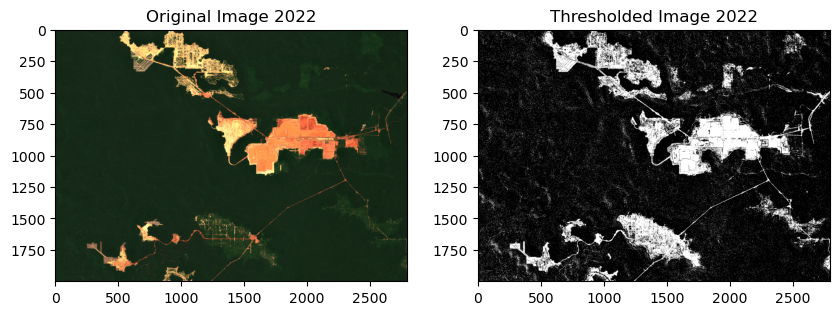

In [15]:
#2019
imag_2019 = imageio.imread(filename1)

zoom_2019 = np.copy(imag_2019[7700:9700,4200:7000])

#Cloud removal
for i in range (2000):
    for j in range (2500):
        if zoom_2019[i,j,0]>150 and zoom_2019[i,j,1]>150 and zoom_2019[i,j,2]>150 :
            zoom_2019[i,j,:] = zoom_2019[1000,600,:]

r_2019 = zoom_2019[:,:, 0]
g_2019 = zoom_2019[:,:, 1]
b_2019 = zoom_2019[:,:, 2]

#Vegetation index NDVI green&blue
ndvi_green_blue_2019 = (b_2019 - g_2019) / (b_2019 + g_2019)

#Application of a Thresholding
thresholded_2019 = ndvi_green_blue_2019 < 3 

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2019)
ax[0].set_title('Original Image 2019')
ax[1].imshow(thresholded_2019, cmap='gray')
ax[1].set_title('Thresholded Image 2019')
plt.show()


#2020
filename3 = "../data/Zone 1/Image 2020/T21MWU_20200906T141049_TCI_10m.jp2"
imag_2020 = imageio.imread(filename3)

zoom_2020 = imag_2020[7700:9700,4200:7000]

r_2020 = zoom_2020[:,:, 0]
g_2020 = zoom_2020[:,:, 1]
b_2020 = zoom_2020[:,:, 2]

#Vegetation index NDVI green&blue
ndvi_green_blue_2020 = (b_2020 - g_2020) / (b_2020 + g_2020)

#Application of a Thresholding
thresholded_2020 = ndvi_green_blue_2020 < 2

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2020)
ax[0].set_title('Original Image 2020')
ax[1].imshow(thresholded_2020, cmap='gray')
ax[1].set_title('Thresholded Image 2020')
plt.show()


#2022
filename4 = "../data/Zone 1/Image 2022/T21MWU_20220807T140709_TCI_10m.jp2"
imag_2022 = imageio.imread(filename4)

zoom_2022 = imag_2022[7700:9700,4200:7000]

r_2022 = zoom_2022[:,:, 0]
g_2022 = zoom_2022[:,:, 1]
b_2022 = zoom_2022[:,:, 2]

#Vegetation index NDVI green&blue
ndvi_green_blue_2022 = (b_2022 - g_2022) / (b_2022 + g_2022)

#Application of a Thresholding
thresholded_2022 = ndvi_green_blue_2022 < 3 

#Image display
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(zoom_2022)
ax[0].set_title('Original Image 2022')
ax[1].imshow(thresholded_2022, cmap='gray')
ax[1].set_title('Thresholded Image 2022')
plt.show()

###### Evolution of the forest rate

Determination of forest rates for the years 2014 to 2022

In [33]:
temps = [2014,2016,2017,2018,2019,2020,2022]
rate = [forest_rate_inverse(thresholded_2014),forest_rate_inverse(thresholded_2016),forest_rate_inverse(thresholded_2017),forest_rate_inverse(thresholded_2018),forest_rate_inverse(thresholded_2019),forest_rate_inverse(thresholded_2020),forest_rate_inverse(thresholded_2022)]
plt.scatter(temps, rate)
plt.xlabel('Years')
plt.ylabel('Forest rate')
plt.title('Evolution of the forest rate')
plt.show()

#### 2.3 Application of a Gradient

###### Pre-processing 2019

We keep the most intense color for each pixels so the forest will be in green and the deforested zone in red

In [19]:
#Reading the image
imag_2019 = imageio.imread(filename1)

zoom_2019 = imag_2019[7700:9700,4200:7000]

plt.imshow(zoom_2019)
plt.show()

C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\3607215115.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2019 = imageio.imread(filename1)


For each pixel, we keep the color (red, green or blue) which has the most intense value

For the year 2019, we have clouds above the forest. We will therefore put them all in green so that they are confuses with the trees.

In [20]:
for i in range(2000):
    for j in range(2800):
        r=zoom_2019[i,j,0]
        v=zoom_2019[i,j,1]
        b=zoom_2019[i,j,2]
        if v>=240 : #all the clouds in green
            zoom_2019[i,j,2]=0
            zoom_2019[i,j,0]=0
        elif r>v and r>b:
            zoom_2019[i,j,1]=0
            zoom_2019[i,j,2]=0
        elif b>r and b>v:
            zoom_2019[i,j,1]=0
            zoom_2019[i,j,0]=0
        else :
            zoom_2019[i,j,2]=0
            zoom_2019[i,j,0]=0

plt.imshow(zoom_2019)
plt.show()

We then set all the pixels to the same value using a threshold. Thus we separated the forest (in green) and the deforested area (in red).

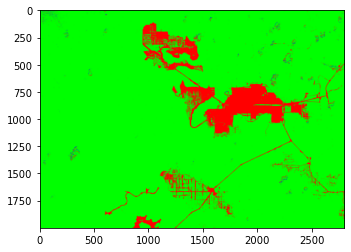

In [21]:
rouge = zoom_2019[:,:,0]
vert = zoom_2019[:,:,1]
bleu = zoom_2019[:,:,2]

seuil = 0 
S1 = vert > seuil
S0 = rouge > seuil
S2 = bleu > seuil

fin19=np.zeros([2000, 2800, 3])
fin19[:,:,0]=S0
fin19[:,:,1]=S1
fin19[:,:,2]=S2

plt.imshow(fin19)
plt.show()

We do the same pre-processing for the images of 2020 and 2022 (without the need to remove the clouds)

C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2831337061.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2020 = imageio.imread(filename3)


C:\Users\boudyp\AppData\Local\Temp\ipykernel_18212\2831337061.py:41: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2022 = imageio.imread(filename4)


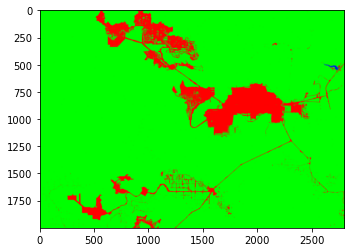

In [34]:
#2020
imag_2020 = imageio.imread(filename3)

zoom_2020 = imag_2020[7700:9700,4200:7000]

#we keep the color which has the most intense value
for i in range(2000):
    for j in range(2800):
        r=zoom_2020[i,j,0]
        v=zoom_2020[i,j,1]
        b=zoom_2020[i,j,2]
        if r>v and r>b:
            zoom_2020[i,j,1]=0
            zoom_2020[i,j,2]=0
        elif b>r and b>v:
            zoom_2020[i,j,1]=0
            zoom_2020[i,j,0]=0
        else :
            zoom_2020[i,j,2]=0
            zoom_2020[i,j,0]=0

#Threshold
rouge2 = zoom_2020[:,:,0]
vert2 = zoom_2020[:,:,1]
bleu2 = zoom_2020[:,:,2]

seuil = 0 
S12 = vert2 > seuil
S02 = rouge2 > seuil
S22 = bleu2 > seuil

fin20=np.zeros([2000, 2800, 3])
fin20[:,:,0]=S02
fin20[:,:,1]=S12
fin20[:,:,2]=S22

plt.imshow(fin20)
plt.show()

#2022
imag_2022 = imageio.imread(filename4)

zoom_2022 = imag_2022[7700:9700,4200:7000]

#we keep the color which has the most intense value
for i in range(2000):
    for j in range(2800):
        r=zoom_2022[i,j,0]
        v=zoom_2022[i,j,1]
        b=zoom_2022[i,j,2]
        if r>v and r>b:
            zoom_2022[i,j,1]=0
            zoom_2022[i,j,2]=0
        elif b>r and b>v:
            zoom_2022[i,j,1]=0
            zoom_2022[i,j,0]=0
        else :
            zoom_2022[i,j,2]=0
            zoom_2022[i,j,0]=0

#Threshold
rouge3 = zoom_2022[:,:,0]
vert3 = zoom_2022[:,:,1]
bleu3 = zoom_2022[:,:,2]

seuil = 0 
S13 = vert3 > seuil
S03 = rouge3 > seuil
S23 = bleu3 > seuil

fin22=np.zeros([2000, 2800, 3])
fin22[:,:,0]=S03
fin22[:,:,1]=S13
fin22[:,:,2]=S23

plt.imshow(fin22)
plt.show()

###### Application of a time gradient

We approximate the gradient to the subtraction of the 2 images

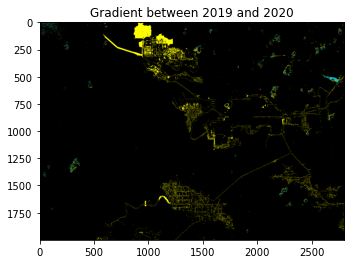

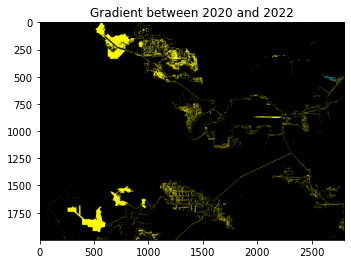

In [35]:
#gradient between 2019 and 2020
grad19_20=abs(fin20-fin19)
plt.imshow(grad19_20)
plt.title("Gradient between 2019 and 2020")
plt.show()

#gradient between 2020 and 2022
grad20_22=abs(fin22-fin20)
plt.imshow(grad20_22)
plt.title("Gradient between 2020 and 2022")
plt.show()

#gradient between 2019 and 2022
grad19_22=abs(fin22-fin19)
plt.imshow(grad19_22)
plt.title("Gradient between 2019 and 2022")
plt.show()

Then, we can count the number of pixels being yellow to deduce the increase in the rate of deforestation over the years.

In [37]:
#Increase of deforestation between 2019 and 2020
red1 = np.copy(grad19_20[:,:,0])
s = 0
for i in range(2000):
    for j in range(2800):
        if red1[i,j]>=0.5:
            s +=1           
s = s/(2000*2800)

print(s)

#Increase of deforestation between 2020 and 2022
red2 = np.copy(grad20_22[:,:,0])
s = 0
for i in range(2000):
    for j in range(2800):
        if red2[i,j]>=0.5:
            s +=1           
s = s/(2000*2800)

print(s)

#Increase of deforestation between 2019 and 2022
red3 = np.copy(grad19_22[:,:,0])
s = 0
for i in range(2000):
    for j in range(2800):
        if red3[i,j]>=0.5:
            s +=1 
s = s/(2000*2800)

print(s)

0.022585178571428572
0.03595125
0.042354642857142855


###### Application of a time gradient on an other zone

Reading the images of the zone for the years 2014 to 2016

In [16]:
# 2014
filename2_2014 = "../data/Zone 1/Image 2014/LC08_L1TP_229061_20140910_20200910_02_T1.jpg"
imag_2014 = imageio.imread(filename2_2014)

# 2016
filename2_2016 = "../data/Zone 1/Image 2016/LC08_L1TP_229061_20161017_20200905_02_T1.jpg"
imag_2016 = imageio.imread(filename2_2016)

# 2017
filename2_2017 = "../data/Zone 1/Image 2017/LC08_L1TP_229061_20171105_20200902_02_T1.jpg"
imag_2017 = imageio.imread(filename2_2017)

# 2018
filename2_2018 = "../data/Zone 1/Image 2018/LC08_L1TP_228061_20180930_20200830_02_T1.jpg"
imag_2018 = imageio.imread(filename2_2018)

#zoom
zoom_2014=imag_2014[4000:,:7000]
img_2014=np.copy(zoom_2014)

zoom_2016=imag_2016[4000:,:7000]
img_2016=np.copy(zoom_2016)

zoom_2017=imag_2017[4000:,:7000]
img_2017=np.copy(zoom_2017)

zoom_2018=imag_2018[4000:-10,:7000]
img_2018=np.copy(zoom_2018)

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\3184974039.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2014 = imageio.imread(filename2_2014)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\3184974039.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag_2016 = imageio.imread(filename2_2016)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\3184974039.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio`

We apply the same pre-processing for the images of the years 2014 to 2018

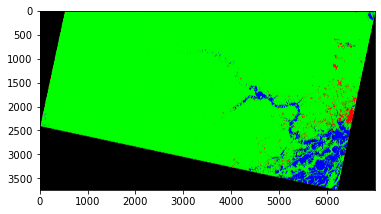

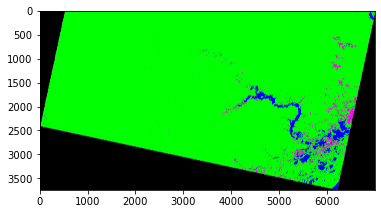

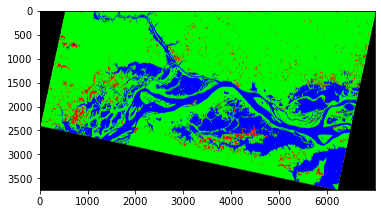

In [66]:
#2014

#we keep the color which has the most intense value
for i in range(3741):
    for j in range(7000):
        r=img_2014[i,j,0]
        v=img_2014[i,j,1]
        b=img_2014[i,j,2]
        if r>v and r>b:
            img_2014[i,j,1]=0
            img_2014[i,j,2]=0
        elif b>r and b>v:
            img_2014[i,j,1]=0
            img_2014[i,j,0]=0
        else :
            img_2014[i,j,2]=0
            img_2014[i,j,0]=0

#Threshold
rouge = img_2014[:,:,0]
vert = img_2014[:,:,1]
bleu = img_2014[:,:,2]

seuil = 0 
Sv14 = vert > seuil
Sr14 = rouge > seuil
Sb14 = bleu > seuil

fin_2014=np.zeros([3741, 7000, 3])
fin_2014[:,:,0]=Sr14
fin_2014[:,:,1]=Sv14
fin_2014[:,:,2]=Sb14

plt.imshow(fin_2014)
plt.show()


#2016

#we keep the color which has the most intense value
for i in range(3741):
    for j in range(7000):
        r=img_2016[i,j,0]
        v=img_2016[i,j,1]
        b=img_2016[i,j,2]
        if r>v and r>b:
            img_2016[i,j,1]=0
            img_2014[i,j,2]=0
        elif b>r and b>v:
            img_2016[i,j,1]=0
            img_2016[i,j,0]=0
        else :
            img_2016[i,j,2]=0
            img_2016[i,j,0]=0

#Threshold
rouge16 = img_2016[:,:,0]
vert16 = img_2016[:,:,1]
bleu16 = img_2016[:,:,2]

Sv16 = vert16 > seuil
Sr16 = rouge16 > seuil
Sb16 = bleu16 > seuil

fin_2016=np.zeros([3741, 7000, 3])
fin_2016[:,:,0]=Sr16
fin_2016[:,:,1]=Sv16
fin_2016[:,:,2]=Sb16

plt.imshow(fin_2016)
plt.show()


#2017

#we keep the color which has the most intense value
for i in range(3741):
    for j in range(7000):
        r=img_2017[i,j,0]
        v=img_2017[i,j,1]
        b=img_2017[i,j,2]
        if r>v and r>b:
            img_2017[i,j,1]=0
            img_2017[i,j,2]=0
        elif b>r and b>v:
            img_2017[i,j,1]=0
            img_2017[i,j,0]=0
        else :
            img_2017[i,j,2]=0
            img_2017[i,j,0]=0
            
#Threshold
rouge17 = img_2017[:,:,0]
vert17 = img_2017[:,:,1]
bleu17 = img_2017[:,:,2]

Sv17 = vert17 > seuil
Sr17 = rouge17 > seuil
Sb17 = bleu17 > seuil

fin_2017=np.zeros([3741, 7000, 3])
fin_2017[:,:,0]=Sr17
fin_2017[:,:,1]=Sv17
fin_2017[:,:,2]=Sb17

plt.imshow(fin_2017)
plt.show()


#2018

#we keep the color which has the most intense value
for i in range(3741):
    for j in range(7000):
        r=img_2018[i,j,0]
        v=img_2018[i,j,1]
        b=img_2018[i,j,2]
        if r>v and r>b:
            img_2018[i,j,1]=0
            img_2018[i,j,2]=0
        elif b>r and b>v:
            img_2018[i,j,1]=0
            img_2018[i,j,0]=0
        else :
            img_2018[i,j,2]=0
            img_2018[i,j,0]=0

#Threshold
rouge18 = img_2018[:,:,0]
vert18 = img_2018[:,:,1]
bleu18 = img_2018[:,:,2]

Sv18 = vert18 > seuil
Sr18 = rouge18 > seuil
Sb18 = bleu18 > seuil

fin_2018=np.zeros([3741, 7000, 3])
fin_2018[:,:,0]=Sr18
fin_2018[:,:,1]=Sv18
fin_2018[:,:,2]=Sb18

plt.imshow(fin_2018)
plt.show()

Then we apply a time gradient on this zone

In [67]:
#gradient between 2014 et 2016
grad14_16=abs(fin_2014-fin_2016)

#gradient between 2016 et 2017
grad16_17=abs(fin_2017-fin_2016)

#gradient between 2017 et 2018
grad17_18=abs(fin_2017-fin_2018)

Image display

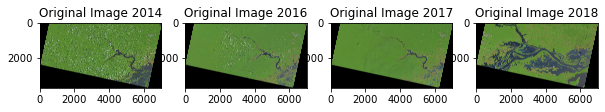

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(10, 5))
ax[0].imshow(zoom_2014)
ax[0].set_title('Original Image 2014')
ax[1].imshow(zoom_2016)
ax[1].set_title('Original Image 2016')
ax[2].imshow(zoom_2017)
ax[2].set_title('Original Image 2017')
ax[3].imshow(zoom_2018)
ax[3].set_title('Original Image 2018')
plt.show()

Gradient display

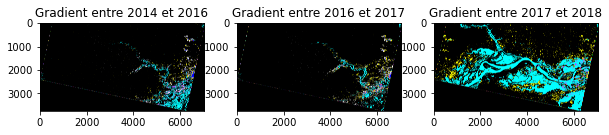

In [69]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].imshow(grad14_16)
ax[0].set_title('Gradient entre 2014 et 2016')
ax[1].imshow(grad16_17)
ax[1].set_title('Gradient entre 2016 et 2017')
ax[2].imshow(grad17_18)
ax[2].set_title('Gradient entre 2017 et 2018')
plt.show()

## 3. Second Approach - Exploitation Of The Chlorophyll Band

#### 3.2 Application of a Thresholding

###### Thresholded image of band 4

Reading images of the band 4 for the years 2019 to 2022

In [17]:
#2019
filename4_19 = "../data/Zone 2 - Fields/image juillet 2019/T21MYN_20190716T140101_B04_10m.jp2"
imag4_19 = imageio.imread(filename4_19)

# 2020
filename4_20 = "../data/Zone 2 - Fields/image août 2020/T21MYN_20200814T140059_B04_10m.jp2"
imag4_20 = imageio.imread(filename4_20)

# 2022
filename4_22 = "../data/Zone 2 - Fields/image juillet 2022/T21MYN_20220720T135721_B04_10m.jp2"
imag4_22 = imageio.imread(filename4_22)

#zoom
img4_19=imag4_19[:,0:5000]
img4_20=imag4_20[:,0:5000]
img4_22=imag4_22[:,0:5000]

C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2915545353.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag4_19 = imageio.imread(filename4_19)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2915545353.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imag4_20 = imageio.imread(filename4_20)
C:\Users\pik58\AppData\Local\Temp\ipykernel_47092\2915545353.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or ca

Application of a threshold

In [51]:
#2019
seuil = 600
S4_19 = img4_19 < seuil

#2020
seuil = 900
S4_20 = img4_20 < seuil
            
#2022
seuil = 2800
S4_22 = img4_22 < seuil

Image display

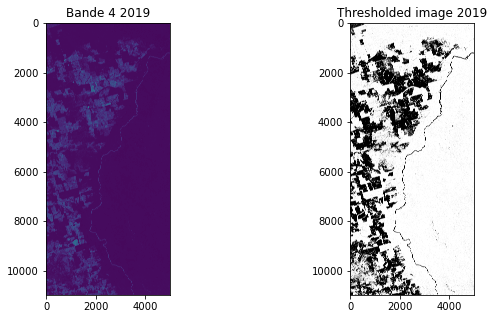

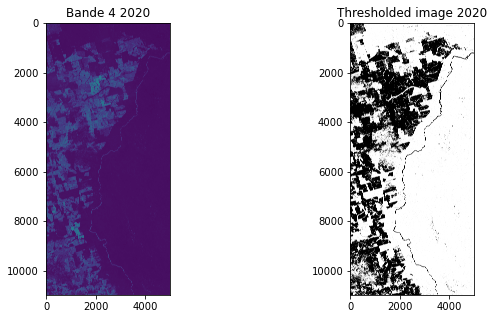

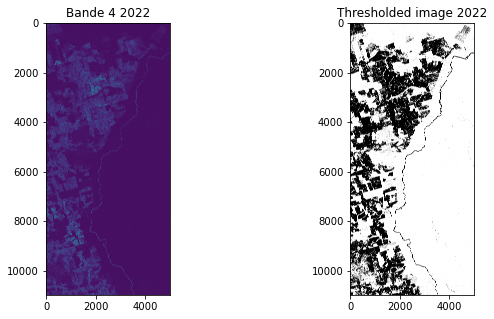

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img4_19)
ax[0].set_title('Bande 4 2019')
ax[1].imshow(S4_19, cmap='gray')
ax[1].set_title('Thresholded image 2019')
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img4_20)
ax[0].set_title('Bande 4 2020')
ax[1].imshow(S4_20, cmap='gray')
ax[1].set_title('Thresholded image 2020')
plt.show()

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img4_22)
ax[0].set_title('Bande 4 2022')
ax[1].imshow(S4_22, cmap='gray')
ax[1].set_title('Thresholded image 2022')
plt.show()

###### Evolution of the forest rate

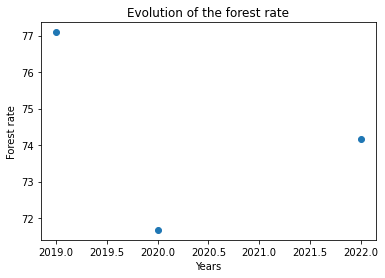

In [53]:
temps = [2019,2020,2022]
rate = [forest_rate(S4_19),forest_rate(S4_20),forest_rate(S4_22)]
plt.scatter(temps, rate)
plt.xlabel('Years')
plt.ylabel('Forest rate')
plt.title('Evolution of the forest rate')
plt.show()

#### 3.3 Application of a Gradient

In [54]:
#gradient between 2019 and 2020
gradS19_20=abs(S4_20^S4_19)

#gradien tbetween 2020 and 2022
gradS20_22=abs(S4_22^S4_20)

#gradient between 2019 and 2022
gradS19_22=abs(S4_22^S4_19)

Image display

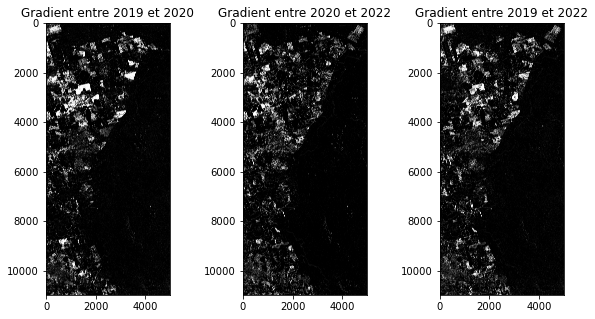

In [55]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].imshow(gradS19_20,'gray')
ax[0].set_title('Gradient entre 2019 et 2020')
ax[1].imshow(gradS20_22,'gray')
ax[1].set_title('Gradient entre 2020 et 2022')
ax[2].imshow(gradS19_22,'gray')
ax[2].set_title('Gradient entre 2019 et 2022')
plt.show()

The evolution of the deforestation rate

In [56]:
r1 = forest_rate(gradS19_20)
r2 = forest_rate(gradS20_22)
r3 = forest_rate(gradS19_22)

print(r1,r2,r3)

7.497424408014572 6.388415300546448 7.201719489981785
